In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from datetime import date

today = date.today()

In [3]:
from bq_helper import BigQueryHelper

# Helper object for BigQuery Ethereum dataset
eth = BigQueryHelper(active_project="bigquery-public-data", 
                     dataset_name="crypto_ethereum")

Using Kaggle's public dataset BigQuery integration.


In [4]:
query = """
WITH contracts_in_block as ( 
    SELECT
      block_timestamp as timestamp,
      count(*) as count
    FROM
      `bigquery-public-data.crypto_ethereum.transactions`
    WHERE
      to_address is null -- contract creation indicator
    GROUP BY
      1
)

SELECT
    *
FROM
    contracts_in_block
ORDER BY
    1 asc
"""

In [5]:
# Estimate total data scanned for query (in GB)
eth.estimate_query_size(query)

44.87419053539634

In [6]:
# Store the results into a Pandas DataFrame
df = eth.query_to_pandas_safe(query, max_gb_scanned=50)

In [7]:
# Convert strings into datetime objects and resample the data to monthly totals

df['date'] = pd.to_datetime(df.timestamp)
agg = df.resample('M', on='date').sum()

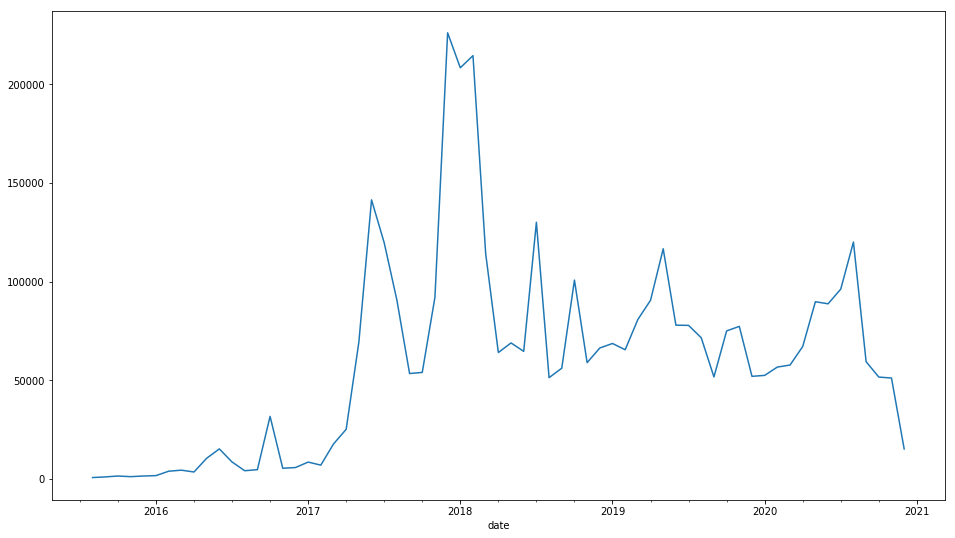

In [8]:
agg.plot(y='count', legend=False, figsize=(16, 9))# title='New Ethereum Smart Contracts (monthly totals)',
plt.savefig('contracts_over_time.png', transparent=True)

In [9]:
df.to_csv(f"contracts_over_time_{today}.csv", index=False)